In [1]:
import subprocess
import json
import sys 
import random
import pandas as pd
import matplotlib.pyplot as plt
import json

In [16]:
with open('cache.json', 'w') as json_file:
    json.dump([data1,data2,data3,data4,data5], json_file)

In [2]:
with open('cache.json', 'r') as json_file:
    t1,t2,t3,t4,t5 = json.load(json_file)
for t in [t1,t2,t3,t4,t5]:
    print(len(t))

200
500
350
500
8400


In [3]:
data1, data2, data3, data4, data5 = t1,t2,t3,t4,t5

In [2]:
random.seed(378)

GENERATOR_CLI = '../build/genbip'
SOLVER_CLI = '/home/chris/repos/findminhs/target/release/findminhs'
header = ['n','m','deg','T','univar','unicls','seed','opt','steps','time']

def measure(n=100, m=100, deg=10, T=0.0, univar=1, unicls=0):
    seed = random.randint(0,10**9)
    genCall = [GENERATOR_CLI, *map(str, [n, m, deg, seed, T, univar, unicls])]
    solCall = [SOLVER_CLI, 'solve', '-r', 'report.json', 'bigirg.graph', 'settings.json']
    with open('bigirg.graph', 'w') as f:
        genlog = subprocess.run(genCall, stdout=f, stderr=subprocess.PIPE)
    subprocess.run(solCall, stderr=subprocess.DEVNULL)
    with open('report.json', 'r') as f:
        report = json.load(f)
    opt = report['opt']
    steps = report['branching_steps']
    rtime = report['runtimes']['total']
    print(f"T {T: >7}   OPT {opt: >7}   STEPS {steps: >7}   TIME {rtime: >7.4f}", genlog.stderr)
    return [n,m,deg,T,univar,unicls,seed,opt,steps,rtime]

def singleSpread(reps=5, **kwargs):
    return [measure(**kwargs) for _ in range(reps)]


# heterogeneity makes it easier

In [3]:
data1 = []
for univar in [0,1]:
    for unicls in [0,1]:
        data1 += singleSpread(reps=50, univar=univar, unicls=unicls, n=200, m=200)

T     0.0   OPT      15   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      16   STEPS       0   TIME  0.0002 b'WARNING: 2 empty clauses\n'
T     0.0   OPT       9   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      21   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      19   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      23   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      22   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      19   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      16   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      14   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      25   STEPS       1   TIME  0.0006 b'WARNING: 1 empty clauses\n'
T     0.0   OPT      17   STEPS       1   TIME  0.0004 b''
T     0.0   OPT      12   STEPS       1   TIME  0.0004 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0002 b''
T   

T     0.0   OPT      30   STEPS       2   TIME  0.0012 b'WARNING: 3 empty clauses\n'
T     0.0   OPT      33   STEPS       1   TIME  0.0016 b'WARNING: 1 empty clauses\n'
T     0.0   OPT      33   STEPS       1   TIME  0.0016 b''
T     0.0   OPT      30   STEPS       1   TIME  0.0023 b''
T     0.0   OPT      35   STEPS       1   TIME  0.0012 b''
T     0.0   OPT      33   STEPS       4   TIME  0.0024 b''
T     0.0   OPT      28   STEPS       1   TIME  0.0017 b''
T     0.0   OPT      35   STEPS       1   TIME  0.0017 b'WARNING: 2 empty clauses\n'
T     0.0   OPT      35   STEPS       2   TIME  0.0013 b'WARNING: 1 empty clauses\n'
T     0.0   OPT      34   STEPS       1   TIME  0.0016 b''
T     0.0   OPT      31   STEPS       1   TIME  0.0017 b''
T     0.0   OPT      32   STEPS       0   TIME  0.0015 b''
T     0.0   OPT      32   STEPS       6   TIME  0.0034 b'WARNING: 1 empty clauses\n'
T     0.0   OPT      32   STEPS       0   TIME  0.0017 b'WARNING: 3 empty clauses\n'
T     0.0   OPT   

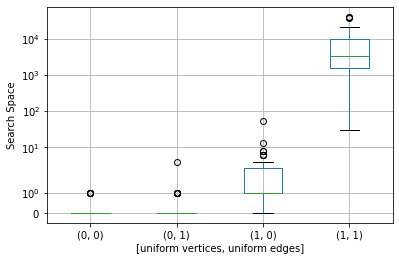

In [11]:
df = pd.DataFrame(data1, columns=header)
df.boxplot(column='steps', by=['univar', 'unicls'])
plt.yscale('symlog')
plt.ylabel('Search Space')
plt.xlabel('[uniform vertices, uniform edges]')
plt.title('')
plt.suptitle('')
plt.savefig(f'plots/dist-steps.pdf')

# more sets than elements is slightly harder

In [4]:
data2 = []
m = 5000
for n in range(500,10001,1000):
    print(n)
    data2 += singleSpread(reps=50, univar=0, unicls=1, n=n, m=m, deg=10)

500
T     0.0   OPT      36   STEPS       5   TIME  0.0298 b''
T     0.0   OPT      17   STEPS       0   TIME  0.0169 b''
T     0.0   OPT      19   STEPS       0   TIME  0.0092 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0088 b''
T     0.0   OPT      16   STEPS       0   TIME  0.0083 b''
T     0.0   OPT      21   STEPS       0   TIME  0.0150 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0038 b''
T     0.0   OPT      19   STEPS       0   TIME  0.0050 b''
T     0.0   OPT      35   STEPS       1   TIME  0.0381 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0036 b''
T     0.0   OPT      29   STEPS       1   TIME  0.0273 b''
T     0.0   OPT      15   STEPS       0   TIME  0.0068 b''
T     0.0   OPT      17   STEPS       0   TIME  0.0088 b''
T     0.0   OPT      22   STEPS       1   TIME  0.0112 b''
T     0.0   OPT      25   STEPS       0   TIME  0.0257 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0068 b''
T     0.0   OPT      29   STEPS       0   TIME  0.03

T     0.0   OPT     118   STEPS       5   TIME  0.1312 b'WARNING: 1 empty clauses\n'
T     0.0   OPT      93   STEPS       3   TIME  0.0844 b''
T     0.0   OPT      73   STEPS       7   TIME  0.0616 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     112   STEPS       1   TIME  0.1024 b''
T     0.0   OPT      83   STEPS       1   TIME  0.0765 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     101   STEPS      27   TIME  0.1076 b''
T     0.0   OPT      83   STEPS       1   TIME  0.0738 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     112   STEPS       9   TIME  0.1076 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     110   STEPS       6   TIME  0.1147 b''
T     0.0   OPT     101   STEPS       2   TIME  0.1126 b''
T     0.0   OPT      56   STEPS       1   TIME  0.0419 b''
T     0.0   OPT      88   STEPS       1   TIME  0.0567 b''
T     0.0   OPT     130   STEPS       6   TIME  0.1390 b''
3500
T     0.0   OPT     116   STEPS       8   TIME  0.0805 b''
T     0.0   OPT     108   STEPS       2

T     0.0   OPT     171   STEPS       7   TIME  0.2604 b''
T     0.0   OPT     218   STEPS      20   TIME  0.3278 b''
T     0.0   OPT     168   STEPS       5   TIME  0.3171 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     158   STEPS       6   TIME  0.1670 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     166   STEPS      55   TIME  0.2129 b''
T     0.0   OPT     134   STEPS       7   TIME  0.1223 b''
T     0.0   OPT     182   STEPS       3   TIME  0.2594 b''
T     0.0   OPT     169   STEPS      22   TIME  0.1928 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     207   STEPS       9   TIME  0.3004 b''
T     0.0   OPT     203   STEPS      49   TIME  0.3018 b''
T     0.0   OPT     234   STEPS     149   TIME  0.3577 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     209   STEPS    1300   TIME  0.5082 b''
T     0.0   OPT     215   STEPS      10   TIME  0.3375 b''
T     0.0   OPT     210   STEPS       2   TIME  0.2743 b''
T     0.0   OPT     163   STEPS      15   TIME  0.2181 b'WARNING: 1 em

T     0.0   OPT     238   STEPS       2   TIME  0.3726 b''
T     0.0   OPT     221   STEPS       1   TIME  0.2995 b''
T     0.0   OPT     192   STEPS      25   TIME  0.1894 b''
T     0.0   OPT     270   STEPS     270   TIME  0.5528 b''
T     0.0   OPT     234   STEPS      47   TIME  0.3637 b''
8500
T     0.0   OPT     205   STEPS      44   TIME  0.1857 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     261   STEPS     625   TIME  0.4873 b'WARNING: 2 empty clauses\n'
T     0.0   OPT     172   STEPS      16   TIME  0.1791 b''
T     0.0   OPT     276   STEPS      35   TIME  0.4798 b''
T     0.0   OPT     218   STEPS      16   TIME  0.3433 b'WARNING: 1 empty clauses\n'
T     0.0   OPT     259   STEPS      76   TIME  0.4582 b''
T     0.0   OPT     332   STEPS       4   TIME  0.6061 b''
T     0.0   OPT     230   STEPS     252   TIME  0.3051 b''
T     0.0   OPT     256   STEPS      86   TIME  0.5582 b''
T     0.0   OPT     324   STEPS     429   TIME  0.5838 b''
T     0.0   OPT     281   STEPS 

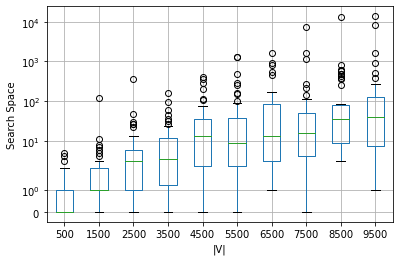

In [12]:
df = pd.DataFrame(data2, columns=header)
df.boxplot(column='steps', by='n')
plt.ylabel('Search Space')
plt.xlabel('|V|')
plt.title('')
plt.suptitle('')
plt.yscale('symlog')
plt.savefig(f'plots/ratio-steps.pdf')

# higher density makes it easier in unicls coz opt shrinks

In [5]:
data3 = []
for deg in range(5,51,5):
    print(deg)
    data3 += singleSpread(reps=50, deg=deg, univar=0, unicls=1, n=5000, m=5000)

5
T     0.0   OPT     552   STEPS       5   TIME  0.0999 b'WARNING: 36 empty clauses\n'
T     0.0   OPT     571   STEPS      83   TIME  0.1310 b'WARNING: 27 empty clauses\n'
T     0.0   OPT     562   STEPS       3   TIME  0.0996 b'WARNING: 45 empty clauses\n'
T     0.0   OPT     578   STEPS      92   TIME  0.1340 b'WARNING: 28 empty clauses\n'
T     0.0   OPT     468   STEPS       3   TIME  0.0524 b'WARNING: 36 empty clauses\n'
T     0.0   OPT     602   STEPS      11   TIME  0.1338 b'WARNING: 38 empty clauses\n'
T     0.0   OPT     491   STEPS       1   TIME  0.0756 b'WARNING: 41 empty clauses\n'
T     0.0   OPT     537   STEPS      15   TIME  0.0892 b'WARNING: 26 empty clauses\n'
T     0.0   OPT     512   STEPS       1   TIME  0.0944 b'WARNING: 29 empty clauses\n'
T     0.0   OPT     579   STEPS       1   TIME  0.1255 b'WARNING: 31 empty clauses\n'
T     0.0   OPT     538   STEPS       7   TIME  0.1175 b'WARNING: 46 empty clauses\n'
T     0.0   OPT     495   STEPS       1   TIME  0.08

T     0.0   OPT     102   STEPS     263   TIME  0.6190 b''
T     0.0   OPT      75   STEPS       2   TIME  0.1925 b''
T     0.0   OPT      59   STEPS      17   TIME  0.0897 b''
T     0.0   OPT      72   STEPS       1   TIME  0.1746 b''
T     0.0   OPT      51   STEPS       0   TIME  0.0534 b''
T     0.0   OPT      56   STEPS       7   TIME  0.0914 b''
T     0.0   OPT     105   STEPS       6   TIME  0.2481 b''
T     0.0   OPT      96   STEPS      29   TIME  0.2909 b''
T     0.0   OPT      81   STEPS       6   TIME  0.2459 b''
T     0.0   OPT      83   STEPS       5   TIME  0.2228 b''
T     0.0   OPT      87   STEPS       1   TIME  0.2822 b''
T     0.0   OPT      90   STEPS      26   TIME  0.2905 b''
T     0.0   OPT      82   STEPS       1   TIME  0.1452 b''
T     0.0   OPT      67   STEPS       3   TIME  0.0964 b''
T     0.0   OPT      77   STEPS      17   TIME  0.2309 b''
T     0.0   OPT     101   STEPS       3   TIME  0.2011 b''
T     0.0   OPT      94   STEPS      54   TIME  0.2582 b

T     0.0   OPT      40   STEPS      59   TIME  0.3562 b''
T     0.0   OPT      28   STEPS       1   TIME  0.1723 b''
T     0.0   OPT      25   STEPS       0   TIME  0.0739 b''
T     0.0   OPT      17   STEPS       0   TIME  0.0581 b''
T     0.0   OPT      23   STEPS       0   TIME  0.1015 b''
T     0.0   OPT      28   STEPS       0   TIME  0.1300 b''
T     0.0   OPT      28   STEPS       1   TIME  0.1086 b''
T     0.0   OPT      17   STEPS       1   TIME  0.1174 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0242 b''
T     0.0   OPT      20   STEPS       1   TIME  0.1165 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0207 b''
T     0.0   OPT      24   STEPS       0   TIME  0.1388 b''
T     0.0   OPT      32   STEPS       0   TIME  0.1868 b''
T     0.0   OPT      29   STEPS       2   TIME  0.2043 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0191 b''
T     0.0   OPT      22   STEPS       1   TIME  0.1777 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0176 b

T     0.0   OPT      23   STEPS       1   TIME  0.1836 b''
T     0.0   OPT      17   STEPS       1   TIME  0.1955 b''
T     0.0   OPT      15   STEPS       1   TIME  0.0977 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0384 b''
T     0.0   OPT      21   STEPS       0   TIME  0.1939 b''
T     0.0   OPT      22   STEPS       0   TIME  0.2088 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0791 b''
T     0.0   OPT      19   STEPS       1   TIME  0.2035 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0391 b''
T     0.0   OPT      13   STEPS       1   TIME  0.0617 b''
45
T     0.0   OPT       9   STEPS       0   TIME  0.0446 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0393 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0694 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0369 b''
T     0.0   OPT      11   STEPS       0   TIME  0.1932 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0444 b''
T     0.0   OPT       1   STEPS       0   TIME  0.038

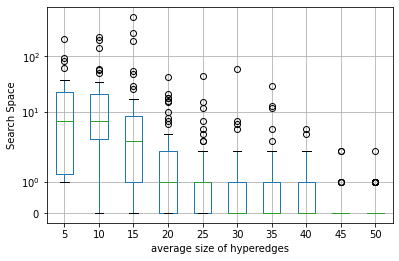

In [13]:
df = pd.DataFrame(data3, columns=header)
df.boxplot(column='steps', by='deg')
plt.ylabel('Search Space')
plt.xlabel('average size of hyperedges')
plt.title('')
plt.suptitle('')
plt.yscale('symlog')
plt.savefig(f'plots/deg-steps-unicls.pdf')

# higher density makes it harder in univar?

In [6]:
data4 = []
for deg in range(5,51,5):
    print(deg)
    data4 += singleSpread(reps=50, deg=deg, univar=1, unicls=0, n=200, m=200)

5
T     0.0   OPT      61   STEPS       0   TIME  0.0001 b'WARNING: 7 empty clauses\n'
T     0.0   OPT      54   STEPS       0   TIME  0.0004 b'WARNING: 5 empty clauses\n'
T     0.0   OPT      59   STEPS       0   TIME  0.0002 b'WARNING: 21 empty clauses\n'
T     0.0   OPT      54   STEPS       1   TIME  0.0004 b'WARNING: 5 empty clauses\n'
T     0.0   OPT      53   STEPS       0   TIME  0.0004 b'WARNING: 6 empty clauses\n'
T     0.0   OPT      49   STEPS       0   TIME  0.0004 b'WARNING: 9 empty clauses\n'
T     0.0   OPT      50   STEPS       1   TIME  0.0004 b'WARNING: 11 empty clauses\n'
T     0.0   OPT      54   STEPS       1   TIME  0.0003 b'WARNING: 10 empty clauses\n'
T     0.0   OPT      52   STEPS       0   TIME  0.0003 b'WARNING: 10 empty clauses\n'
T     0.0   OPT      57   STEPS       1   TIME  0.0002 b'WARNING: 12 empty clauses\n'
T     0.0   OPT      57   STEPS       1   TIME  0.0004 b'WARNING: 15 empty clauses\n'
T     0.0   OPT      55   STEPS       1   TIME  0.0003 b'

T     0.0   OPT      21   STEPS      51   TIME  0.0182 b'WARNING: 1 empty clauses\n'
T     0.0   OPT      19   STEPS       2   TIME  0.0041 b''
T     0.0   OPT      21   STEPS     245   TIME  0.0829 b''
T     0.0   OPT      21   STEPS       3   TIME  0.0041 b''
T     0.0   OPT      19   STEPS     154   TIME  0.0656 b''
T     0.0   OPT      20   STEPS      14   TIME  0.0077 b''
T     0.0   OPT      23   STEPS      23   TIME  0.0132 b''
T     0.0   OPT      23   STEPS      31   TIME  0.0132 b''
T     0.0   OPT      25   STEPS      37   TIME  0.0132 b''
T     0.0   OPT      21   STEPS      46   TIME  0.0216 b''
T     0.0   OPT      26   STEPS      25   TIME  0.0079 b''
T     0.0   OPT      23   STEPS      48   TIME  0.0237 b''
T     0.0   OPT      22   STEPS      66   TIME  0.0278 b''
T     0.0   OPT      18   STEPS     917   TIME  0.3218 b''
T     0.0   OPT      21   STEPS      20   TIME  0.0089 b''
T     0.0   OPT      22   STEPS     144   TIME  0.0644 b''
T     0.0   OPT      21   STEP

T     0.0   OPT      14   STEPS     553   TIME  0.1678 b''
T     0.0   OPT      13   STEPS    1041   TIME  0.3205 b''
T     0.0   OPT      13   STEPS     173   TIME  0.0597 b''
T     0.0   OPT      14   STEPS     119   TIME  0.0477 b''
30
T     0.0   OPT      11   STEPS     993   TIME  0.3592 b''
T     0.0   OPT      12   STEPS     840   TIME  0.3557 b''
T     0.0   OPT      11   STEPS     820   TIME  0.3657 b''
T     0.0   OPT      11   STEPS     315   TIME  0.1681 b''
T     0.0   OPT      11   STEPS     133   TIME  0.0653 b''
T     0.0   OPT      11   STEPS     195   TIME  0.1046 b''
T     0.0   OPT      11   STEPS     545   TIME  0.2227 b''
T     0.0   OPT      12   STEPS    3589   TIME  1.3979 b''
T     0.0   OPT      13   STEPS    1265   TIME  0.4703 b''
T     0.0   OPT      12   STEPS    2504   TIME  0.9782 b''
T     0.0   OPT      11   STEPS     284   TIME  0.1231 b''
T     0.0   OPT      12   STEPS    3761   TIME  1.3806 b''
T     0.0   OPT      12   STEPS     853   TIME  0.308

T     0.0   OPT       9   STEPS    1424   TIME  0.4229 b''
T     0.0   OPT       9   STEPS    1363   TIME  0.6700 b''
T     0.0   OPT       9   STEPS    1157   TIME  0.4564 b''
T     0.0   OPT       9   STEPS     347   TIME  0.1626 b''
T     0.0   OPT       9   STEPS    1574   TIME  0.6415 b''
T     0.0   OPT       9   STEPS    1982   TIME  0.7369 b''
T     0.0   OPT       9   STEPS    2034   TIME  0.6378 b''
T     0.0   OPT       9   STEPS    1019   TIME  0.3363 b''
T     0.0   OPT       9   STEPS    5383   TIME  1.9141 b''
T     0.0   OPT       9   STEPS    1990   TIME  0.7674 b''
T     0.0   OPT       9   STEPS    1215   TIME  0.6318 b''
T     0.0   OPT       9   STEPS     432   TIME  0.2138 b''
T     0.0   OPT       8   STEPS     580   TIME  0.3607 b''
T     0.0   OPT       9   STEPS     570   TIME  0.2677 b''
T     0.0   OPT       9   STEPS    1057   TIME  0.4776 b''
45
T     0.0   OPT       8   STEPS     774   TIME  0.3484 b''
T     0.0   OPT       8   STEPS     828   TIME  0.582

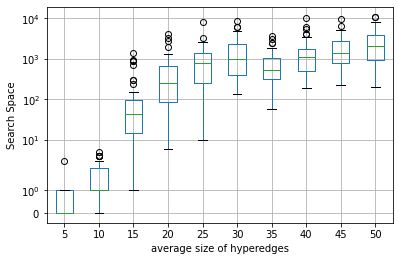

In [14]:
df = pd.DataFrame(data4, columns=header)
df.boxplot(column='steps', by='deg')
plt.ylabel('Search Space')
plt.xlabel('average size of hyperedges')
plt.title('')
plt.suptitle('')
plt.yscale('symlog')
plt.savefig(f'plots/deg-steps-univar.pdf')

# clustering makes it easier

In [7]:
data5 = []
for T in range(0,10,3):
    for size in range(50,301,25):
        if T==9 and size>250:
           continue
        print(size)
        data5 += singleSpread(reps=200, univar=0, unicls=1, T=T/10, n=size, m=size)

50
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       1   TIME  0.0002 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       1   TIME  0.0002 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.000

T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       1   TIME  0.0004 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       1   TIME  0.0002 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0002 b

T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       5   STEPS       1   TIME  0.0007 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       2   STEPS       0   TIME  0.0001 b

T     0.0   OPT       6   STEPS       1   TIME  0.0004 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0004 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b

T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       8   STEPS       1   TIME  0.0007 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       5   STEPS       1   TIME  0.0002 b''
125
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.00

T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0004 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b

T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       9   STEPS       1   TIME  0.0010 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       3   TIME  0.0015 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0008 b''
T     0.0   OPT      13   STEPS       1   TIME  0.0010 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0004 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0007 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0001 b

T     0.0   OPT      10   STEPS       0   TIME  0.0006 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0008 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      12   STEPS       1   TIME  0.0012 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0006 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       1   TIME  0.0006 b''
T     0.0   OPT       9   STEPS       1   TIME  0.0005 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      11   STEPS       1   TIME  0.0016 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0002 b

T     0.0   OPT       7   STEPS       0   TIME  0.0001 b'WARNING: 1 empty clauses\n'
T     0.0   OPT       7   STEPS       0   TIME  0.0006 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       7   STEPS       1   TIME  0.0005 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0008 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0009 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0008 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0009 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       5   STEP

T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       1   TIME  0.0004 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       1   TIME  0.0012 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       1   TIME  0.0012 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0001 b

T     0.0   OPT      11   STEPS       0   TIME  0.0006 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      12   STEPS       1   TIME  0.0005 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0010 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b'WARNING: 2 empty clauses\n'
T     0.0   OPT      14   STEPS       0   TIME  0.0007 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      13   STEPS       2   TIME  0.0014 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0008 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       4   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       1   STEP

T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0009 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      14   STEPS       0   TIME  0.0006 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0010 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0010 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      12   STEPS       1   TIME  0.0008 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0006 b

T     0.0   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      15   STEPS       0   TIME  0.0007 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0008 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0004 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0013 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0003 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      14   STEPS       0   TIME  0.0011 b

T     0.0   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0014 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0004 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      16   STEPS       4   TIME  0.0033 b''
T     0.0   OPT      14   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      10   STEPS       1   TIME  0.0015 b''
T     0.0   OPT      13   STEPS       1   TIME  0.0020 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0015 b''
T     0.0   OPT      15   STEPS       0   TIME  0.0024 b''
T     0.0   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0003 b

T     0.0   OPT      14   STEPS       0   TIME  0.0006 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT      15   STEPS       1   TIME  0.0011 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      15   STEPS       0   TIME  0.0005 b''
T     0.0   OPT      17   STEPS       0   TIME  0.0018 b''
T     0.0   OPT      12   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0005 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      16   STEPS       1   TIME  0.0022 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0002 b

T     0.0   OPT       9   STEPS       0   TIME  0.0008 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0005 b''
T     0.0   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      15   STEPS       0   TIME  0.0014 b''
T     0.0   OPT      10   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0016 b''
T     0.0   OPT      11   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      15   STEPS       0   TIME  0.0005 b''
T     0.0   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.0   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.0   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.0   OPT      14   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      14   STEPS       0   TIME  0.0022 b'WARNING: 1 empty clauses\n'
T     0.0   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      13   STEPS       0   TIME  0.0003 b''
T     0.0   OPT      16   STEPS       1   TIME  0.0026 b''
T     0.0   OPT       7   STEP

T     0.3   OPT       4   STEPS       1   TIME  0.0003 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       1   TIME  0.0002 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0000 b

T     0.3   OPT       5   STEPS       0   TIME  0.0003 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0004 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       1   TIME  0.0006 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0005 b

T     0.3   OPT       5   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       8   STEPS       5   TIME  0.0016 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b

T     0.3   OPT       7   STEPS       1   TIME  0.0011 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0004 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       1   TIME  0.0012 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       4   STEPS       1   TIME  0.0002 b''
T     0.3   OPT       8   STEPS       3   TIME  0.0018 b''
T     0.3   OPT       7   STEPS       2   TIME  0.0013 b''
T     0.3   OPT       6   STEPS       1   TIME  0.0011 b

T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0005 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       1   TIME  0.0008 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0005 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.3   OPT       9   STEPS       1   TIME  0.0012 b''
T     0.3   OPT       8   STEPS       1   TIME  0.0009 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b

T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b'WARNING: 1 empty clauses\n'
T     0.3   OPT       9   STEPS       0   TIME  0.0003 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0004 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0004 b''
T     0.3   OPT       9   STEP

T     0.3   OPT      11   STEPS       0   TIME  0.0006 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0007 b''
T     0.3   OPT      11   STEPS       1   TIME  0.0015 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       1   TIME  0.0007 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       2   TIME  0.0016 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      11   STEPS       1   TIME  0.0006 b

T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      12   STEPS       1   TIME  0.0022 b''
T     0.3   OPT      10   STEPS       1   TIME  0.0016 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      12   STEPS       7   TIME  0.0023 b''
T     0.3   OPT      12   STEPS       2   TIME  0.0033 b''
T     0.3   OPT      11   STEPS       2   TIME  0.0034 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0008 b''
T     0.3   OPT      11   STEPS       5   TIME  0.0028 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b

T     0.3   OPT      10   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       2   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      10   STEPS       1   TIME  0.0016 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0004 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      15   STEPS      13   TIME  0.0066 b''
T     0.3   OPT      11   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0006 b'WARNING: 1 empty clauses\n'
T     0.3   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       8   STEP

T     0.3   OPT      16   STEPS       2   TIME  0.0044 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0016 b''
T     0.3   OPT      11   STEPS       0   TIME  0.0011 b''
T     0.3   OPT      15   STEPS      12   TIME  0.0074 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      13   STEPS       2   TIME  0.0012 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      11   STEPS       0   TIME  0.0004 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      14   STEPS       6   TIME  0.0045 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0017 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       4   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      11   STEPS       1   TIME  0.0014 b

T     0.3   OPT      13   STEPS       7   TIME  0.0035 b''
T     0.3   OPT      15   STEPS       4   TIME  0.0036 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      14   STEPS       4   TIME  0.0029 b''
T     0.3   OPT      11   STEPS       1   TIME  0.0018 b''
T     0.3   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      13   STEPS       0   TIME  0.0011 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      12   STEPS       1   TIME  0.0018 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       9   STEPS       1   TIME  0.0007 b''
T     0.3   OPT      11   STEPS       0   TIME  0.0002 b

T     0.3   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      11   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      13   STEPS       1   TIME  0.0019 b''
T     0.3   OPT       6   STEPS       1   TIME  0.0004 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      11   STEPS       2   TIME  0.0004 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0003 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0006 b''
T     0.3   OPT      15   STEPS       0   TIME  0.0007 b'WARNING: 1 empty clauses\n'
T     0.3   OPT      16   STEPS       3   TIME  0.0071 b''
T     0.3   OPT      19   STEPS      12   TIME  0.0120 b''
T     0.3   OPT      14   STEPS       1   TIME  0.0010 b''
T     0.3   OPT      13   STEPS       1   TIME  0.0020 b''
T     0.3   OPT      18   STEP

T     0.3   OPT      20   STEPS       8   TIME  0.0062 b''
T     0.3   OPT       8   STEPS       0   TIME  0.0004 b''
T     0.3   OPT      15   STEPS       1   TIME  0.0025 b''
T     0.3   OPT      14   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      14   STEPS       1   TIME  0.0020 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0013 b''
T     0.3   OPT      15   STEPS       0   TIME  0.0012 b''
T     0.3   OPT      14   STEPS       2   TIME  0.0032 b''
T     0.3   OPT      16   STEPS       1   TIME  0.0025 b''
T     0.3   OPT      13   STEPS       2   TIME  0.0022 b''
T     0.3   OPT      12   STEPS       1   TIME  0.0013 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0019 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0005 b'WARNING: 1 empty clauses\n'
T     0.3   OPT      15   STEPS       0   TIME  0.0010 b''
T     0.3   OPT      15   STEPS       0   TIME  0.0012 b''
T     0.3   OPT       8   STEP

T     0.3   OPT      13   STEPS       0   TIME  0.0005 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      13   STEPS       0   TIME  0.0004 b''
T     0.3   OPT      14   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      20   STEPS       2   TIME  0.0063 b''
T     0.3   OPT      18   STEPS       2   TIME  0.0040 b''
T     0.3   OPT      14   STEPS       1   TIME  0.0017 b''
T     0.3   OPT      14   STEPS       0   TIME  0.0003 b''
T     0.3   OPT      11   STEPS       0   TIME  0.0011 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0003 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0007 b''
T     0.3   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      15   STEPS       1   TIME  0.0029 b''
T     0.3   OPT      17   STEPS       0   TIME  0.0009 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0002 b

T     0.3   OPT      19   STEPS       9   TIME  0.0093 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0004 b''
T     0.3   OPT      12   STEPS       1   TIME  0.0008 b''
T     0.3   OPT      13   STEPS       0   TIME  0.0003 b''
T     0.3   OPT      17   STEPS       2   TIME  0.0035 b''
T     0.3   OPT      16   STEPS       1   TIME  0.0019 b''
T     0.3   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.3   OPT      15   STEPS       4   TIME  0.0019 b''
T     0.3   OPT       1   STEPS       0   TIME  0.0002 b''
T     0.3   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      13   STEPS       0   TIME  0.0005 b''
T     0.3   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.3   OPT      18   STEPS       8   TIME  0.0046 b''
T     0.3   OPT      12   STEPS       0   TIME  0.0002 b

T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       1   TIME  0.0008 b''
T     0.6   OPT       5   STEPS       4   TIME  0.0011 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       2   TIME  0.0004 b''
T     0.6   OPT       4   STEPS       1   TIME  0.0004 b''
T     0.6   OPT       4   STEPS       1   TIME  0.0004 b''
T     0.6   OPT       4   STEPS       1   TIME  0.0005 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       2   TIME  0.0005 b''
T     0.6   OPT       4   STEPS       1   TIME  0.0004 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       2   TIME  0.0005 b

T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       5   STEPS       2   TIME  0.0008 b''
T     0.6   OPT       6   STEPS       4   TIME  0.0010 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0013 b''
T     0.6   OPT       5   STEPS       2   TIME  0.0012 b''
T     0.6   OPT       5   STEPS       1   TIME  0.0008 b

T     0.6   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
100
T     0.6   OPT       6   STEPS       3   TIME  0.0018 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       6   STEPS       1   TIME  0.0006 b''
T     0.6   OPT       8   STEPS       6   TIME  0.0033 b''
T     0.6   OPT       9   STEPS       4   TIME  0.0031 b''
T     0.6   OPT       8   STEPS       7   TIME  0.0029 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.6   OPT       6   STEPS       3   TIME  0.0019 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0002 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0002 b''
T     0.6   OPT       9   STEPS      11   TIME  0.0028 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       4   STEPS       0   TIME  0.00

T     0.6   OPT       8   STEPS       4   TIME  0.0020 b''
T     0.6   OPT       8   STEPS       9   TIME  0.0041 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       6   STEPS       2   TIME  0.0006 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0005 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       9   STEPS      16   TIME  0.0067 b''
T     0.6   OPT       8   STEPS       4   TIME  0.0021 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0008 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b

T     0.6   OPT       9   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       9   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      13   STEPS     240   TIME  0.0748 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       9   STEPS       1   TIME  0.0015 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      10   STEPS       8   TIME  0.0049 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      11   STEPS       0   TIME  0.0014 b

T     0.6   OPT      12   STEPS       8   TIME  0.0082 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      10   STEPS       6   TIME  0.0052 b''
T     0.6   OPT       9   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       9   STEPS       1   TIME  0.0006 b''
T     0.6   OPT       5   STEPS       1   TIME  0.0016 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      10   STEPS       2   TIME  0.0005 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       9   STEPS       8   TIME  0.0042 b''
T     0.6   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      10   STEPS       5   TIME  0.0042 b''
T     0.6   OPT       9   STEPS       0   TIME  0.0005 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      11   STEPS      11   TIME  0.0076 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0010 b''
T     0.6   OPT      10   STEPS       8   TIME  0.0013 b

T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      12   STEPS      33   TIME  0.0120 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0003 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      10   STEPS       2   TIME  0.0028 b''
T     0.6   OPT       8   STEPS       1   TIME  0.0005 b''
T     0.6   OPT      12   STEPS       8   TIME  0.0044 b''
T     0.6   OPT       7   STEPS       2   TIME  0.0024 b''
T     0.6   OPT       2   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      10   STEPS       2   TIME  0.0033 b''
T     0.6   OPT      12   STEPS      42   TIME  0.0205 b''
T     0.6   OPT       9   STEPS       4   TIME  0.0030 b''
T     0.6   OPT      10   STEPS       5   TIME  0.0049 b''
T     0.6   OPT       7   STEPS       1   TIME  0.0004 b''
T     0.6   OPT      10   STEPS       6   TIME  0.0061 b

T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      16   STEPS      33   TIME  0.0322 b''
T     0.6   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.6   OPT      14   STEPS      14   TIME  0.0103 b''
T     0.6   OPT      16   STEPS     667   TIME  0.3674 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      13   STEPS       8   TIME  0.0077 b''
T     0.6   OPT      14   STEPS       9   TIME  0.0108 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      12   STEPS       5   TIME  0.0016 b''
T     0.6   OPT      12   STEPS       1   TIME  0.0035 b''
T     0.6   OPT      10   STEPS       1   TIME  0.0027 b''
T     0.6   OPT       9   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      11   STEPS       2   TIME  0.0036 b''
T     0.6   OPT      14   STEPS      25   TIME  0.0194 b''
T     0.6   OPT      15   STEPS      14   TIME  0.0184 b''
T     0.6   OPT      13   STEPS      11   TIME  0.0097 b

T     0.6   OPT      12   STEPS      13   TIME  0.0030 b''
T     0.6   OPT      16   STEPS      59   TIME  0.0557 b''
T     0.6   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      16   STEPS      82   TIME  0.0541 b''
T     0.6   OPT       3   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      13   STEPS       1   TIME  0.0047 b''
T     0.6   OPT      14   STEPS      19   TIME  0.0121 b''
T     0.6   OPT      16   STEPS      18   TIME  0.0209 b''
T     0.6   OPT      16   STEPS      81   TIME  0.0484 b''
T     0.6   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      12   STEPS       3   TIME  0.0046 b''
T     0.6   OPT      13   STEPS       8   TIME  0.0032 b''
T     0.6   OPT      10   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      11   STEPS       2   TIME  0.0015 b''
T     0.6   OPT      10   STEPS       1   TIME  0.0008 b''
T     0.6   OPT      13   STEPS       1   TIME  0.0021 b

T     0.6   OPT      13   STEPS       0   TIME  0.0013 b''
T     0.6   OPT      12   STEPS       2   TIME  0.0021 b''
T     0.6   OPT      14   STEPS      18   TIME  0.0164 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      17   STEPS      79   TIME  0.0443 b''
T     0.6   OPT      12   STEPS       2   TIME  0.0011 b''
225
T     0.6   OPT      18   STEPS      41   TIME  0.0319 b''
T     0.6   OPT      15   STEPS       8   TIME  0.0157 b''
T     0.6   OPT      14   STEPS       5   TIME  0.0065 b''
T     0.6   OPT      14   STEPS      15   TIME  0.0186 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      15   STEPS       2   TIME  0.0076 b''
T     0.6   OPT      13   STEPS       7   TIME  0.0108 b''
T     0.6   OPT      19   STEPS     815   TIME  0.4365 b''
T     0.6   OPT      15   STEPS      11   TIME  0.0130 b''
T     0.6   OPT      14   STEPS       5   TIME  0.0111 b''
T     0.6   OPT      11   STEPS       1   TIME  0.00

T     0.6   OPT      15   STEPS      12   TIME  0.0131 b''
T     0.6   OPT      17   STEPS     114   TIME  0.1064 b''
T     0.6   OPT      13   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      14   STEPS      12   TIME  0.0090 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      13   STEPS       1   TIME  0.0019 b''
T     0.6   OPT      14   STEPS      36   TIME  0.0154 b''
T     0.6   OPT      17   STEPS      30   TIME  0.0275 b''
T     0.6   OPT      13   STEPS       7   TIME  0.0121 b''
T     0.6   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      16   STEPS     100   TIME  0.0562 b''
T     0.6   OPT      15   STEPS      33   TIME  0.0198 b''
T     0.6   OPT      14   STEPS       4   TIME  0.0083 b''
T     0.6   OPT      14   STEPS       6   TIME  0.0033 b''
T     0.6   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      12   STEPS      13   TIME  0.0040 b''
T     0.6   OPT      11   STEPS       0   TIME  0.0002 b

T     0.6   OPT      12   STEPS       2   TIME  0.0012 b''
T     0.6   OPT      17   STEPS      11   TIME  0.0120 b''
T     0.6   OPT      16   STEPS      14   TIME  0.0104 b''
T     0.6   OPT      14   STEPS       2   TIME  0.0013 b''
T     0.6   OPT      12   STEPS       8   TIME  0.0021 b''
T     0.6   OPT      16   STEPS      40   TIME  0.0279 b''
T     0.6   OPT      14   STEPS       1   TIME  0.0094 b''
T     0.6   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      10   STEPS       0   TIME  0.0003 b''
T     0.6   OPT      20   STEPS     221   TIME  0.2904 b''
T     0.6   OPT      12   STEPS       0   TIME  0.0005 b''
T     0.6   OPT      15   STEPS       2   TIME  0.0020 b''
T     0.6   OPT      16   STEPS      13   TIME  0.0219 b''
T     0.6   OPT       1   STEPS       0   TIME  0.0001 b''
T     0.6   OPT      14   STEPS       2   TIME  0.0082 b''
T     0.6   OPT      13   STEPS       3   TIME  0.0102 b''
T     0.6   OPT      15   STEPS       4   TIME  0.0087 b

T     0.6   OPT      22   STEPS     459   TIME  0.3742 b''
T     0.6   OPT      10   STEPS       1   TIME  0.0011 b''
T     0.6   OPT      10   STEPS       1   TIME  0.0003 b''
T     0.6   OPT      13   STEPS       2   TIME  0.0045 b''
T     0.6   OPT      18   STEPS      17   TIME  0.0248 b''
T     0.6   OPT      16   STEPS       1   TIME  0.0027 b''
T     0.6   OPT      18   STEPS       2   TIME  0.0082 b''
T     0.6   OPT      17   STEPS       6   TIME  0.0055 b''
T     0.6   OPT      18   STEPS      14   TIME  0.0236 b''
T     0.6   OPT      16   STEPS       4   TIME  0.0150 b''
T     0.6   OPT      12   STEPS       1   TIME  0.0013 b''
T     0.6   OPT      18   STEPS     103   TIME  0.0926 b''
T     0.6   OPT      21   STEPS     106   TIME  0.1056 b''
T     0.6   OPT      12   STEPS       2   TIME  0.0009 b''
T     0.6   OPT      16   STEPS       0   TIME  0.0022 b''
T     0.6   OPT      16   STEPS       4   TIME  0.0120 b''
T     0.6   OPT      20   STEPS     148   TIME  0.0928 b

T     0.6   OPT      21   STEPS      74   TIME  0.0799 b''
T     0.6   OPT      23   STEPS     942   TIME  1.2042 b''
T     0.6   OPT       8   STEPS       0   TIME  0.0003 b''
T     0.6   OPT      21   STEPS      60   TIME  0.0749 b''
T     0.6   OPT      13   STEPS       0   TIME  0.0002 b''
T     0.6   OPT      18   STEPS      12   TIME  0.0383 b''
T     0.6   OPT      16   STEPS      11   TIME  0.0123 b''
T     0.6   OPT      12   STEPS      13   TIME  0.0025 b''
T     0.6   OPT      22   STEPS      31   TIME  0.0311 b''
T     0.6   OPT      13   STEPS       1   TIME  0.0021 b''
T     0.6   OPT      13   STEPS       0   TIME  0.0005 b''
T     0.6   OPT      17   STEPS       9   TIME  0.0156 b''
T     0.6   OPT      14   STEPS       4   TIME  0.0010 b''
T     0.6   OPT      16   STEPS       3   TIME  0.0104 b''
T     0.6   OPT      16   STEPS      14   TIME  0.0170 b''
T     0.6   OPT      16   STEPS       4   TIME  0.0048 b''
T     0.6   OPT      10   STEPS       0   TIME  0.0002 b

T     0.6   OPT      22   STEPS    1501   TIME  0.7137 b''
T     0.6   OPT      19   STEPS       4   TIME  0.0222 b''
T     0.6   OPT      15   STEPS       0   TIME  0.0005 b''
T     0.6   OPT      13   STEPS       0   TIME  0.0005 b''
T     0.6   OPT      17   STEPS       6   TIME  0.0196 b''
T     0.6   OPT      20   STEPS      45   TIME  0.0439 b''
T     0.6   OPT      22   STEPS     193   TIME  0.2222 b''
T     0.6   OPT      18   STEPS       6   TIME  0.0190 b''
T     0.6   OPT      21   STEPS     147   TIME  0.1156 b''
T     0.6   OPT      12   STEPS       0   TIME  0.0031 b''
T     0.6   OPT      22   STEPS      50   TIME  0.0610 b''
T     0.6   OPT      17   STEPS       4   TIME  0.0125 b''
T     0.6   OPT      21   STEPS      89   TIME  0.1112 b''
T     0.6   OPT      20   STEPS      79   TIME  0.0965 b''
T     0.6   OPT      17   STEPS       8   TIME  0.0049 b''
T     0.6   OPT      16   STEPS      20   TIME  0.0164 b''
T     0.6   OPT      21   STEPS      79   TIME  0.0923 b

T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       5   STEPS       2   TIME  0.0006 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       5   STEPS       2   TIME  0.0007 b''
T     0.9   OPT       5   STEPS       3   TIME  0.0009 b''
T     0.9   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0002 b''
T     0.9   OPT       4   STEPS       2   TIME  0.0006 b''
T     0.9   OPT       5   STEPS       3   TIME  0.0003 b''
T     0.9   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       5   STEPS       2   TIME  0.0006 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       4   STEPS       1   TIME  0.0003 b

T     0.9   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       1   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       5   STEPS       4   TIME  0.0010 b''
T     0.9   OPT       6   STEPS       6   TIME  0.0013 b''
T     0.9   OPT       4   STEPS       1   TIME  0.0004 b''
T     0.9   OPT       3   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       5   STEPS       4   TIME  0.0006 b''
T     0.9   OPT       2   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       4   STEPS       3   TIME  0.0008 b''
75
T     0.9   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       8   STEPS      13   TIME  0.0026 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       7   STEPS       3   TIME  0.0013 b''
T     0.9   OPT       6   STEPS       5   TIME  0.0012 b''
T     0.9   OPT       5   STEPS       2   TIME  0.000

T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       6   STEPS       1   TIME  0.0008 b''
T     0.9   OPT       5   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       6   STEPS       2   TIME  0.0014 b''
T     0.9   OPT       8   STEPS      23   TIME  0.0065 b''
T     0.9   OPT       7   STEPS      17   TIME  0.0037 b''
T     0.9   OPT       5   STEPS       4   TIME  0.0002 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       7   STEPS      17   TIME  0.0039 b''
T     0.9   OPT       5   STEPS       2   TIME  0.0010 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       8   STEPS      20   TIME  0.0043 b''
T     0.9   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       8   STEPS      52   TIME  0.0103 b''
T     0.9   OPT       5   STEPS       2   TIME  0.0003 b''
T     0.9   OPT       7   STEPS       0   TIME  0.0001 b

T     0.9   OPT       9   STEPS      28   TIME  0.0100 b''
T     0.9   OPT       7   STEPS       3   TIME  0.0008 b''
T     0.9   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       9   STEPS       9   TIME  0.0037 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0000 b''
T     0.9   OPT       8   STEPS       4   TIME  0.0007 b''
T     0.9   OPT       5   STEPS       0   TIME  0.0002 b''
T     0.9   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.9   OPT       9   STEPS       7   TIME  0.0030 b''
T     0.9   OPT       9   STEPS       4   TIME  0.0023 b''
T     0.9   OPT       7   STEPS       1   TIME  0.0007 b''
T     0.9   OPT       9   STEPS       6   TIME  0.0024 b''
T     0.9   OPT      11   STEPS     184   TIME  0.0383 b''
T     0.9   OPT       7   STEPS       1   TIME  0.0009 b''
T     0.9   OPT       9   STEPS      14   TIME  0.0032 b''
T     0.9   OPT       8   STEPS      11   TIME  0.0033 b

T     0.9   OPT       8   STEPS       1   TIME  0.0010 b''
T     0.9   OPT      10   STEPS      26   TIME  0.0116 b''
T     0.9   OPT      11   STEPS      20   TIME  0.0086 b''
T     0.9   OPT       9   STEPS      17   TIME  0.0019 b''
T     0.9   OPT      12   STEPS     142   TIME  0.0645 b''
T     0.9   OPT      11   STEPS      53   TIME  0.0235 b''
T     0.9   OPT      11   STEPS       7   TIME  0.0039 b''
T     0.9   OPT      12   STEPS     113   TIME  0.0380 b''
T     0.9   OPT      11   STEPS       7   TIME  0.0037 b''
T     0.9   OPT      10   STEPS       4   TIME  0.0028 b''
T     0.9   OPT       6   STEPS       0   TIME  0.0002 b''
T     0.9   OPT      11   STEPS      21   TIME  0.0121 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.9   OPT      13   STEPS     503   TIME  0.1706 b''
T     0.9   OPT      11   STEPS      23   TIME  0.0097 b''
T     0.9   OPT      11   STEPS      17   TIME  0.0081 b''
T     0.9   OPT      11   STEPS      27   TIME  0.0122 b

T     0.9   OPT      12   STEPS     106   TIME  0.0464 b'WARNING: 1 empty clauses\n'
T     0.9   OPT      13   STEPS     882   TIME  0.2964 b''
T     0.9   OPT       7   STEPS       0   TIME  0.0001 b''
T     0.9   OPT      10   STEPS       3   TIME  0.0030 b''
T     0.9   OPT       6   STEPS       0   TIME  0.0001 b''
T     0.9   OPT      10   STEPS       7   TIME  0.0029 b''
T     0.9   OPT      10   STEPS      11   TIME  0.0033 b''
T     0.9   OPT      12   STEPS      73   TIME  0.0224 b''
T     0.9   OPT      10   STEPS      10   TIME  0.0076 b''
T     0.9   OPT      11   STEPS      29   TIME  0.0105 b''
T     0.9   OPT      14   STEPS    1393   TIME  0.4723 b''
T     0.9   OPT      11   STEPS      43   TIME  0.0113 b''
T     0.9   OPT      12   STEPS      44   TIME  0.0125 b''
T     0.9   OPT      10   STEPS       1   TIME  0.0004 b''
T     0.9   OPT      12   STEPS      29   TIME  0.0132 b''
T     0.9   OPT       9   STEPS       8   TIME  0.0024 b''
T     0.9   OPT      11   STEP

T     0.9   OPT      13   STEPS      34   TIME  0.0162 b''
T     0.9   OPT      16   STEPS    5967   TIME  2.2475 b''
T     0.9   OPT      13   STEPS      59   TIME  0.0343 b''
T     0.9   OPT      13   STEPS      57   TIME  0.0265 b''
T     0.9   OPT      13   STEPS      85   TIME  0.0295 b''
T     0.9   OPT      11   STEPS      11   TIME  0.0041 b''
T     0.9   OPT      12   STEPS      22   TIME  0.0052 b''
T     0.9   OPT       7   STEPS       0   TIME  0.0004 b''
T     0.9   OPT      16   STEPS    1676   TIME  0.6192 b''
T     0.9   OPT      13   STEPS      51   TIME  0.0221 b''
T     0.9   OPT      13   STEPS      37   TIME  0.0110 b''
T     0.9   OPT      10   STEPS       1   TIME  0.0029 b''
T     0.9   OPT      10   STEPS       5   TIME  0.0029 b''
T     0.9   OPT       4   STEPS       0   TIME  0.0001 b''
T     0.9   OPT      12   STEPS      45   TIME  0.0240 b''
T     0.9   OPT      14   STEPS     134   TIME  0.0592 b''
T     0.9   OPT      11   STEPS       6   TIME  0.0021 b

T     0.9   OPT      16   STEPS      84   TIME  0.0476 b''
T     0.9   OPT       9   STEPS       3   TIME  0.0007 b''
T     0.9   OPT      11   STEPS       5   TIME  0.0018 b''
T     0.9   OPT      16   STEPS       4   TIME  0.0068 b''
T     0.9   OPT      13   STEPS       6   TIME  0.0035 b''
T     0.9   OPT       7   STEPS       2   TIME  0.0006 b''
T     0.9   OPT       7   STEPS       1   TIME  0.0002 b''
T     0.9   OPT      10   STEPS       2   TIME  0.0012 b''
T     0.9   OPT       7   STEPS       2   TIME  0.0005 b''
T     0.9   OPT      15   STEPS     123   TIME  0.0391 b''
T     0.9   OPT      15   STEPS     105   TIME  0.0525 b''
T     0.9   OPT      13   STEPS      13   TIME  0.0080 b''
T     0.9   OPT      11   STEPS       3   TIME  0.0014 b''
T     0.9   OPT       9   STEPS       2   TIME  0.0010 b''
T     0.9   OPT      15   STEPS      60   TIME  0.0565 b''
T     0.9   OPT      15   STEPS      93   TIME  0.0438 b''
T     0.9   OPT      16   STEPS     268   TIME  0.1353 b

T     0.9   OPT      16   STEPS      83   TIME  0.0343 b''
T     0.9   OPT      16   STEPS     236   TIME  0.1229 b''
T     0.9   OPT      16   STEPS     445   TIME  0.2263 b''
T     0.9   OPT      12   STEPS      35   TIME  0.0095 b''
T     0.9   OPT      13   STEPS      33   TIME  0.0270 b''
T     0.9   OPT      13   STEPS       7   TIME  0.0026 b''
T     0.9   OPT      18   STEPS    2184   TIME  0.9888 b''
T     0.9   OPT      15   STEPS      30   TIME  0.0213 b''
T     0.9   OPT      13   STEPS       7   TIME  0.0080 b''
T     0.9   OPT      15   STEPS     148   TIME  0.0693 b''
T     0.9   OPT      16   STEPS     736   TIME  0.3424 b''
T     0.9   OPT       7   STEPS       0   TIME  0.0002 b''
T     0.9   OPT      13   STEPS       5   TIME  0.0061 b''
T     0.9   OPT      16   STEPS     169   TIME  0.0535 b''
T     0.9   OPT      16   STEPS     947   TIME  0.4488 b''
T     0.9   OPT      18   STEPS   13949   TIME  6.4356 b''
T     0.9   OPT      17   STEPS    1399   TIME  0.7000 b

T     0.9   OPT      17   STEPS     190   TIME  0.1258 b''
T     0.9   OPT       6   STEPS       1   TIME  0.0003 b''
T     0.9   OPT      15   STEPS      26   TIME  0.0239 b''
T     0.9   OPT      14   STEPS       9   TIME  0.0110 b''
T     0.9   OPT      18   STEPS    1233   TIME  0.8677 b''
T     0.9   OPT      15   STEPS       6   TIME  0.0177 b''
T     0.9   OPT      13   STEPS       7   TIME  0.0073 b''
T     0.9   OPT      14   STEPS      15   TIME  0.0119 b''
T     0.9   OPT      19   STEPS    6444   TIME  2.8672 b''
T     0.9   OPT      17   STEPS     162   TIME  0.1272 b''
T     0.9   OPT      19   STEPS     789   TIME  0.4171 b''
T     0.9   OPT      17   STEPS     116   TIME  0.0899 b''
T     0.9   OPT      16   STEPS      92   TIME  0.0535 b''
T     0.9   OPT      17   STEPS     160   TIME  0.1378 b''
T     0.9   OPT      14   STEPS      17   TIME  0.0110 b''
T     0.9   OPT      18   STEPS     723   TIME  0.4468 b''
T     0.9   OPT      20   STEPS   13657   TIME  7.6471 b

T     0.9   OPT      21   STEPS   19724   TIME 13.2939 b''
T     0.9   OPT      15   STEPS      10   TIME  0.0141 b''
T     0.9   OPT      19   STEPS     248   TIME  0.2312 b''
T     0.9   OPT      17   STEPS      56   TIME  0.0416 b''
T     0.9   OPT      18   STEPS      92   TIME  0.0664 b''
T     0.9   OPT      21   STEPS    3880   TIME  2.2043 b''
T     0.9   OPT      19   STEPS     659   TIME  0.4556 b''
T     0.9   OPT      21   STEPS    3739   TIME  2.2157 b''
T     0.9   OPT      20   STEPS     362   TIME  0.3405 b''
T     0.9   OPT      21   STEPS    2710   TIME  1.7528 b''
T     0.9   OPT      19   STEPS    3744   TIME  2.5209 b''
T     0.9   OPT      21   STEPS    3236   TIME  1.7188 b''
T     0.9   OPT      14   STEPS       2   TIME  0.0033 b''
T     0.9   OPT      19   STEPS    2011   TIME  0.8649 b''
T     0.9   OPT      13   STEPS       2   TIME  0.0044 b''
T     0.9   OPT      19   STEPS     301   TIME  0.3096 b''
T     0.9   OPT      14   STEPS       4   TIME  0.0099 b

T     0.9   OPT      18   STEPS      59   TIME  0.0375 b''
T     0.9   OPT      17   STEPS      52   TIME  0.0530 b''
T     0.9   OPT      17   STEPS      33   TIME  0.0228 b''
T     0.9   OPT      18   STEPS     168   TIME  0.1359 b''
T     0.9   OPT      19   STEPS     299   TIME  0.1374 b''
T     0.9   OPT      17   STEPS     289   TIME  0.1240 b''
T     0.9   OPT      13   STEPS       3   TIME  0.0016 b''
T     0.9   OPT       8   STEPS       0   TIME  0.0001 b''
T     0.9   OPT      17   STEPS       9   TIME  0.0148 b''
T     0.9   OPT      15   STEPS      11   TIME  0.0105 b''
T     0.9   OPT      17   STEPS     291   TIME  0.1347 b''
250
T     0.9   OPT      17   STEPS       3   TIME  0.0055 b''
T     0.9   OPT      24   STEPS   14295   TIME 16.1930 b''
T     0.9   OPT      16   STEPS      20   TIME  0.0147 b''
T     0.9   OPT      17   STEPS      47   TIME  0.0327 b''
T     0.9   OPT      23   STEPS   53574   TIME 45.7894 b''
T     0.9   OPT      21   STEPS     124   TIME  0.08

T     0.9   OPT      20   STEPS     499   TIME  0.3706 b''
T     0.9   OPT      21   STEPS     419   TIME  0.2531 b''
T     0.9   OPT      18   STEPS     142   TIME  0.0748 b''
T     0.9   OPT      17   STEPS      12   TIME  0.0152 b''
T     0.9   OPT      17   STEPS      21   TIME  0.0137 b''
T     0.9   OPT      22   STEPS    6209   TIME  4.4917 b''
T     0.9   OPT      15   STEPS      38   TIME  0.0231 b''
T     0.9   OPT      22   STEPS     309   TIME  0.2202 b''
T     0.9   OPT      14   STEPS       4   TIME  0.0099 b''
T     0.9   OPT      22   STEPS    1190   TIME  0.9812 b''
T     0.9   OPT      20   STEPS     133   TIME  0.1596 b''
T     0.9   OPT       9   STEPS       2   TIME  0.0004 b'WARNING: 1 empty clauses\n'
T     0.9   OPT      21   STEPS    1048   TIME  0.5346 b''
T     0.9   OPT      14   STEPS       6   TIME  0.0020 b''
T     0.9   OPT      22   STEPS    1831   TIME  0.7615 b''
T     0.9   OPT      17   STEPS       8   TIME  0.0158 b''
T     0.9   OPT      22   STEP

KeyboardInterrupt: 

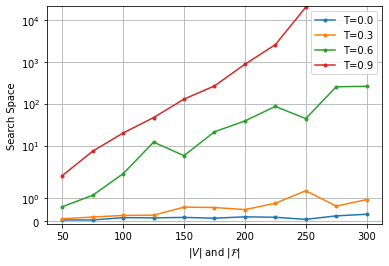

In [15]:
df = pd.DataFrame(data5, columns=header)
for T, view in df.groupby('T'):
    view.groupby('n').steps.mean().plot(marker='.', ax=plt.gca(), label=f'{T=}')
plt.legend()
plt.yscale('symlog')
plt.ylim(bottom=-0.1)
plt.ylabel('Search Space')
plt.xlabel('$|V|$ and $|\mathcal{F}|$')
plt.grid()
plt.savefig(f'plots/temp-steps.pdf')

# overview

In [ ]:
for univar in [0,1]:
    for unicls in [0,1]:
        if univar and unicls:
            continue

        # ratio
        data = []
        for n in range(50,201,10):
            data += singleSpread(reps=20, n=n, univar=univar, unicls=unicls)
        df = pd.DataFrame(data, columns=header)
        for col in ['opt','steps','time']:
            df.boxplot(column=col, by='n')
            plt.savefig(f'plots/{univar}{unicls}-ratio-{col}.pdf')

        # temp
        data = []
        for T in range(0, 10):
            data += singleSpread(reps=20, T=T/10, univar=univar, unicls=unicls)
        df = pd.DataFrame(data, columns=header)
        for col in ['opt','steps','time']:
            df.boxplot(column=col, by='T')
            plt.savefig(f'plots/{univar}{unicls}-temp-{col}.pdf')

        # deg
        data = []
        for deg in range(5, 21):
            print(deg)
            data += singleSpread(reps=50, deg=deg, univar=univar, unicls=unicls)
        df = pd.DataFrame(data, columns=header)
        for col in ['opt','steps','time']:
            df.boxplot(column=col, by='deg')
            plt.savefig(f'plots/{univar}{unicls}-deg-{col}.pdf')
